In [2]:
from __future__ import absolute_import , division ,print_function,unicode_literals

#Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

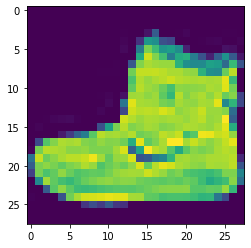

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

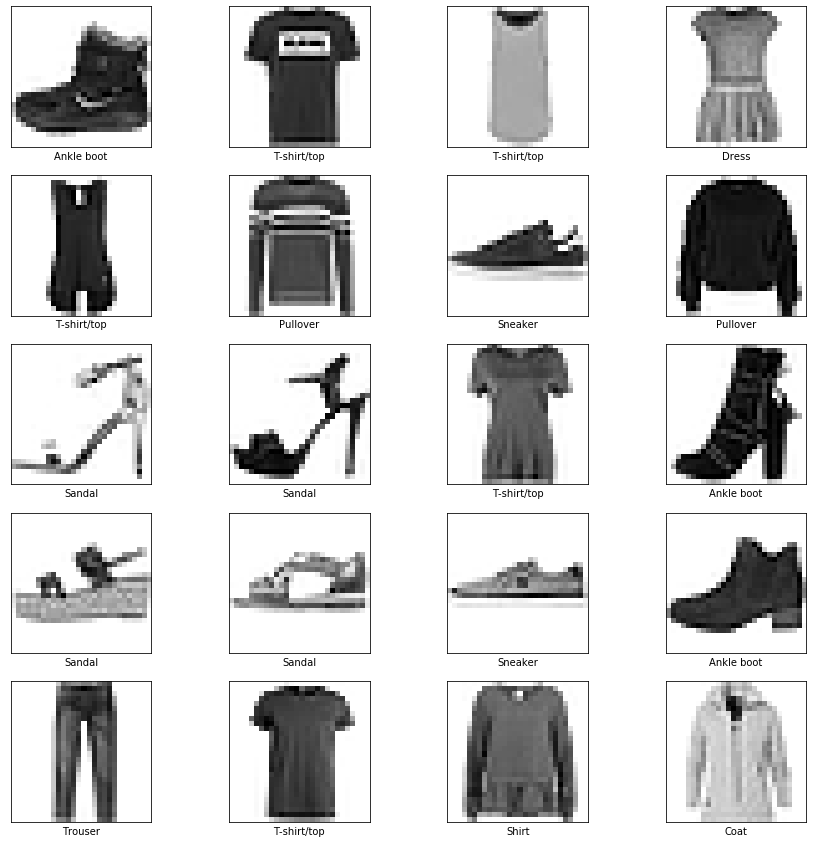

In [20]:
plt.figure(figsize=(15,15))
#for i in range(25)
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [21]:
#Flatten Layer transforms the (28,28) 2D Image to 1D 28*28=784 pixels 
#(unstacking rows of pixels in the image and then lining them up).This layer has no parameters to learn 
#2 Dense layers(Fully Connected Layers) .First layer has 128 nodes
#The second and last layer has 10 node softmax that is an array of probabilities scores that sum to 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4999 - accuracy: 0.8261
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3750 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3389 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3148 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2966 - accuracy: 0.8921


In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


10000/1 - 0s - loss: 0.3253 - accuracy: 0.8747


In [25]:
predictions = model.predict(test_images)
predictions[0]


array([7.1785871e-06, 4.9376609e-07, 1.0618216e-06, 1.7007245e-06,
       9.3810223e-07, 1.6144084e-02, 8.3002460e-06, 7.3276512e-02,
       5.9658505e-06, 9.1055381e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])


9

In [27]:
test_labels[0]


9

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                color=color)    
  
    



In [31]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

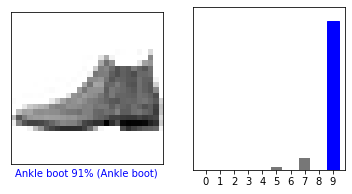

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

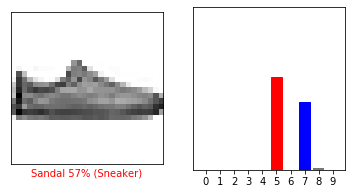

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

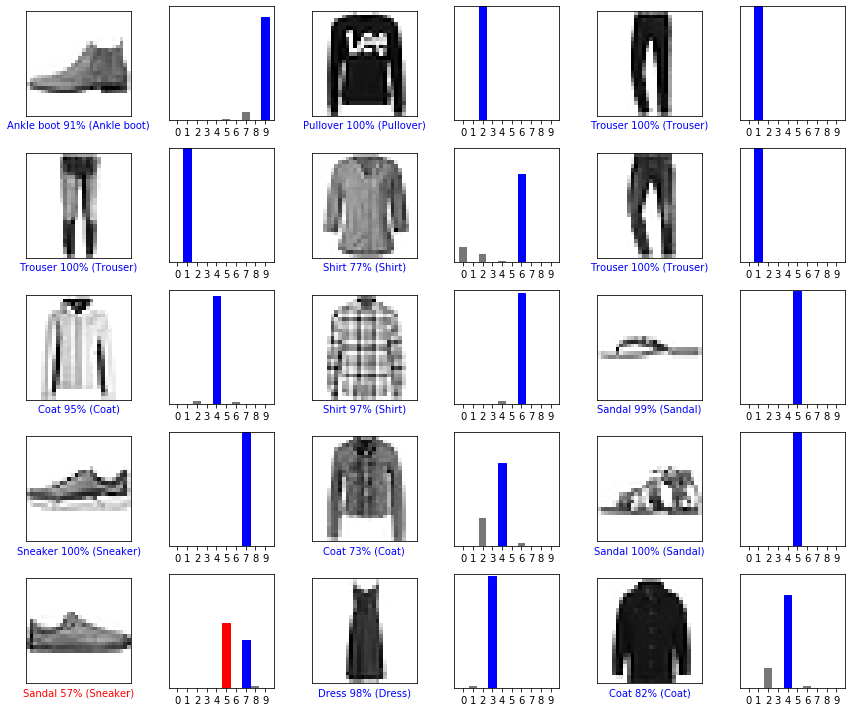

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [38]:
img = test_images[1]
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


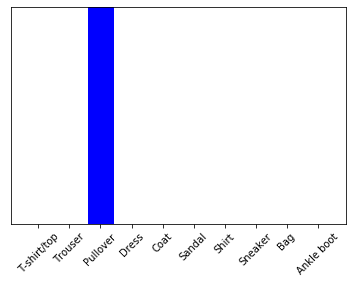

In [39]:
predictions_single = model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])


2